In [1]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
from math import nan
import pandas as pd

from qtrendutils import filter_utils as filt
from qtrendutils import averaging_utils as avg
from qtrendutils import calendar_utils as cal
from qtrendutils import linfit_utils as linfit

import sys

import sys
plt.rc('font', family='Arial')

In [2]:
plotpath="/project/cas/islas/python_plots/qtrend_paper/figures/supplemental/"

### Observations, global averages

In [3]:
basepath="/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/global_avgs/"
era5_q = xr.open_dataset(basepath+"ERA5_q.nc")*1000.
era5_q = era5_q.sel(time=slice("1980-01-01","2020-12-31"))
era5_q_anoms = era5_q - era5_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
era5_q_12m = filt.runningmean(era5_q_anoms, 12, timeaxis='time', dropna=False)
era5_q_am = cal.calcannualmean(era5_q_anoms)
timemonth = np.arange(0,era5_q.time.size,1)*(1./12.) + 1980

era5_relhum = xr.open_dataset(basepath+"ERA5_relhum.nc")
era5_relhum = era5_relhum.sel(time=slice("1980-01-01","2020-12-31"))
era5_relhum_anoms = era5_relhum - era5_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
era5_relhum_12m = filt.runningmean(era5_relhum_anoms, 12, timeaxis='time', dropna=False)
era5_relhum_am = cal.calcannualmean(era5_relhum_anoms)

era5_t = xr.open_dataset(basepath+"ERA5_tas.nc")
era5_t = era5_t.sel(time=slice("1980-01-01","2020-12-31"))
era5_t_anoms = era5_t - era5_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
era5_t_12m = filt.runningmean(era5_t_anoms, 12, timeaxis='time', dropna=False)
era5_t_am = cal.calcannualmean(era5_t_anoms)

best_t = xr.open_dataset(basepath+"BEST_tas.nc")
best_t = best_t.sel(time=slice("1980-01-01","2020-12-31"))
best_t_anoms = best_t - best_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
best_t_12m = filt.runningmean(best_t_anoms, 12, timeaxis='time', dropna=False)
best_t_am = cal.calcannualmean(best_t_anoms)

### CMIP global averages

In [4]:
cmip6_q = xr.open_dataset(basepath+'CMIP6_q.nc')*1000.
cmip6_q = cmip6_q.sel(time=slice("1980-01-01","2020-12-31"))
cmip6_q_anoms = cmip6_q - cmip6_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
cmip6_q_12m = filt.runningmean(cmip6_q_anoms, 12, timeaxis='time', dropna=False)
cmip6_q_am = cal.calcannualmean(cmip6_q_anoms)
timemonth_cmip = np.arange(0,cmip6_q.time.size,1)*(1./12.) + 1980
cmip6_q_memm = cmip6_q_12m.mean('member')
cmip6_q_em = cmip6_q_memm.mean('model')

cmip6_t = xr.open_dataset(basepath+'CMIP6_tas.nc')
cmip6_t = cmip6_t.sel(time=slice("1980-01-01","2020-12-31"))
cmip6_t_anoms = cmip6_t - cmip6_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
cmip6_t_12m = filt.runningmean(cmip6_t_anoms, 12, timeaxis='time', dropna=False)
cmip6_t_am = cal.calcannualmean(cmip6_t_anoms)
timemonth_cmip = np.arange(0,cmip6_t.time.size,1)*(1./12.) + 1980
cmip6_t_memm = cmip6_t_12m.mean('member')
cmip6_t_em = cmip6_t_memm.mean('model')

cmip6_relhum = xr.open_dataset(basepath+'CMIP6_relhum.nc')
cmip6_relhum = cmip6_relhum.sel(time=slice("1980-01-01","2020-12-31"))
cmip6_relhum_anoms = cmip6_relhum - cmip6_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
cmip6_relhum_12m = filt.runningmean(cmip6_relhum_anoms, 12, timeaxis='time', dropna=False)
cmip6_relhum_am = cal.calcannualmean(cmip6_relhum_anoms)
timemonth_cmip = np.arange(0,cmip6_relhum.time.size,1)*(1./12.) + 1980
cmip6_relhum_memm = cmip6_relhum_12m.mean('member')
cmip6_relhum_em = cmip6_relhum_memm.mean('model')


cmip6_q_12m_stack = cmip6_q_12m.stack(z=('member','model'))
cmip6_q_12m_stack = cmip6_q_12m_stack.where( ~np.isnan(cmip6_q_12m_stack.isel(time=240)), drop=True)

cmip6_t_12m_stack = cmip6_t_12m.stack(z=('member','model'))
cmip6_t_12m_stack = cmip6_t_12m_stack.where( ~np.isnan(cmip6_t_12m_stack.isel(time=240)), drop=True)

cmip6_relhum_12m_stack = cmip6_relhum_12m.stack(z=('member','model'))
cmip6_relhum_12m_stack = cmip6_relhum_12m_stack.where( ~np.isnan(cmip6_relhum_12m_stack.isel(time=240)), drop=True)


cmip6_q_am_stack = cmip6_q_am.stack(z=('member','model'))
cmip6_q_am_stack = cmip6_q_am_stack.dropna('z')

cmip6_t_am_stack = cmip6_t_am.stack(z=('member','model'))
cmip6_t_am_stack = cmip6_t_am_stack.dropna('z')

cmip6_relhum_am_stack = cmip6_relhum_am.stack(z=('member','model'))
cmip6_relhum_am_stack = cmip6_relhum_am_stack.dropna('z')

### AMIP6 global averages

In [5]:
amip6_q = xr.open_dataset(basepath+'AMIP6_q.nc')*1000.
amip6_q = amip6_q.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4']) #!!!FIX THIS
amip6_q = amip6_q.sel(time=slice("1980-01-01","2020-12-31"))
amip6_q_anoms = amip6_q - amip6_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
amip6_q_12m = filt.runningmean(amip6_q_anoms, 12, timeaxis='time', dropna=False)
amip6_q_am = cal.calcannualmean(amip6_q_anoms)
timemonth_amip = np.arange(0,amip6_q.time.size,1)*(1./12.) + 1980
amip6_q_memm = amip6_q_12m.mean('member')
amip6_q_em = amip6_q_memm.mean('model')

amip6_t = xr.open_dataset(basepath+'AMIP6_tas.nc')
amip6_t = amip6_t.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4'])
amip6_t = amip6_t.sel(time=slice("1980-01-01","2020-12-31"))
amip6_t_anoms = amip6_t - amip6_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
amip6_t_12m = filt.runningmean(amip6_t_anoms, 12, timeaxis='time', dropna=False)
amip6_t_am = cal.calcannualmean(amip6_t_anoms)
timemonth_amip = np.arange(0,amip6_t.time.size,1)*(1./12.) + 1980
amip6_t_memm = amip6_t_12m.mean('member')
amip6_t_em = amip6_t_memm.mean('model')

amip6_relhum = xr.open_dataset(basepath+'AMIP6_relhum.nc')
amip6_relhum = amip6_relhum.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4'])
amip6_relhum = amip6_relhum.sel(time=slice("1980-01-01","2020-12-31"))
amip6_relhum_anoms = amip6_relhum - amip6_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
amip6_relhum_12m = filt.runningmean(amip6_relhum_anoms, 12, timeaxis='time', dropna=False)
amip6_relhum_am = cal.calcannualmean(amip6_relhum_anoms)
timemonth_amip = np.arange(0,amip6_relhum.time.size,1)*(1./12.) + 1980
amip6_relhum_memm = amip6_relhum_12m.mean('member')
amip6_relhum_em = amip6_relhum_memm.mean('model')


amip6_q_12m_stack = amip6_q_12m.stack(z=('member','model'))
amip6_q_12m_stack = amip6_q_12m_stack.where( ~np.isnan(amip6_q_12m_stack.isel(time=240)), drop=True)

amip6_t_12m_stack = amip6_t_12m.stack(z=('member','model'))
amip6_t_12m_stack = amip6_t_12m_stack.where( ~np.isnan(amip6_t_12m_stack.isel(time=240)), drop=True)

amip6_relhum_12m_stack = amip6_relhum_12m.stack(z=('member','model'))
amip6_relhum_12m_stack = amip6_relhum_12m_stack.where( ~np.isnan(amip6_relhum_12m_stack.isel(time=240)), drop=True)

amip6_q_am_stack = amip6_q_am.stack(z=('member','model'))
amip6_q_am_stack = amip6_q_am_stack.dropna('z')

amip6_t_am_stack = amip6_t_am.stack(z=('member','model'))
amip6_t_am_stack = amip6_t_am_stack.dropna('z')

amip6_relhum_am_stack = amip6_relhum_am.stack(z=('member','model'))
amip6_relhum_am_stack = amip6_relhum_am_stack.dropna('z')

### LENS2 and GOGA2

In [6]:
lens2_q = xr.open_dataset(basepath+'LENS2_q.nc')*1000.
lens2_q = lens2_q.sel(time=slice("1980-01-01","2020-12-31"))
lens2_q_anoms = lens2_q - lens2_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
lens2_q_12m = filt.runningmean(lens2_q_anoms, 12, timeaxis='time', dropna=False)
lens2_q_am = cal.calcannualmean(lens2_q_anoms)
timemonth_lens2 = np.arange(0,lens2_q.time.size,1)*(1./12.) + 1980

lens2_t = xr.open_dataset(basepath+'LENS2_tas.nc')
lens2_t = lens2_t.sel(time=slice("1980-01-01","2020-12-31"))
lens2_t_anoms = lens2_t - lens2_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
lens2_t_12m = filt.runningmean(lens2_t_anoms, 12, timeaxis='time', dropna=False)
lens2_t_am = cal.calcannualmean(lens2_t_anoms)

lens2_relhum = xr.open_dataset(basepath+'LENS2_relhum.nc')
lens2_relhum = lens2_relhum.sel(time=slice("1980-01-01","2020-12-31"))
lens2_relhum_anoms = lens2_relhum - lens2_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
lens2_relhum_12m = filt.runningmean(lens2_relhum_anoms, 12, timeaxis='time', dropna=False)
lens2_relhum_am = cal.calcannualmean(lens2_relhum_anoms)



goga2_q = xr.open_dataset(basepath+'GOGA2_q.nc')*1000.
goga2_q = goga2_q.sel(time=slice("1980-01-01","2020-12-31"))
goga2_q_anoms = goga2_q - goga2_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
goga2_q_12m = filt.runningmean(goga2_q_anoms, 12, timeaxis='time', dropna=False)
goga2_q_am = cal.calcannualmean(goga2_q_anoms)
timemonth_goga2 = np.arange(0,goga2_q.time.size,1)*(1./12.) + 1980

goga2_t = xr.open_dataset(basepath+'GOGA2_tas.nc')
goga2_t = goga2_t.sel(time=slice("1980-01-01","2020-12-31"))
goga2_t_anoms = goga2_t - goga2_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
goga2_t_12m = filt.runningmean(goga2_t_anoms, 12, timeaxis='time', dropna=False)
goga2_t_am = cal.calcannualmean(goga2_t_anoms)

goga2_relhum = xr.open_dataset(basepath+'GOGA2_relhum.nc')
goga2_relhum = goga2_relhum.sel(time=slice("1980-01-01","2020-12-31"))
goga2_relhum_anoms = goga2_relhum - goga2_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
goga2_relhum_am = cal.calcannualmean(goga2_relhum_anoms)
goga2_relhum_12m = filt.runningmean(goga2_relhum_anoms, 12, timeaxis='time', dropna=False)

### Sub-routine for plotting the plot

In [7]:
def plotpanel(fig, landtype, era5, cmip6, amip6, lens2, goga2, ylim, ylabels, ylabelstr, titlestr, ytitlestr, x1, x2, y1, y2, best=None,
              legendloc='upper left', printends=None):
    ax = fig.add_axes([x1, y1, (x2-x1), (y2-y1)])
    ax.set_ylim(ylim)
    ax.set_yticks(ylabels)
    ax.set_yticklabels(ylabelstr, fontsize=14)
    ax.set_xlim(1980,2020)
    ax.set_xticks([1980,1990,2000,2010,2020])
    ax.set_xticklabels(['1980','1990','2000','2010','2020'], fontsize=14)
    ax.set_title(titlestr, fontsize=16)
    ax.set_ylabel(ytitlestr, fontsize=14)
    
    cmip6_stack = cmip6.stack(z=('member','model'))
    amip6_stack = amip6.stack(z=('member','model'))
    
    timemonth_cmip = np.arange(0,cmip6.time.size,1)*(1./12.) + 1980
    timemonth_amip = np.arange(0,amip6.time.size,1)*(1./12.) + 1980
    timemonth = np.arange(0,era5.time.size,1)*(1./12.) + 1980
    
    min95_cmip6 = cmip6_stack[landtype].quantile(0.025, dim='z')
    max95_cmip6 = cmip6_stack[landtype].quantile(0.975, dim='z')
    ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)
    
    min95_amip6 = amip6_stack[landtype].quantile(0.025, dim='z')
    max95_amip6 = amip6_stack[landtype].quantile(0.975, dim='z')
    ax.fill_between(timemonth_amip, min95_amip6, max95_amip6, color='lightsteelblue')
    
    cmip6_m = cmip6.mean('member', skipna=True)
    cmip6_mmm = cmip6_m.mean('model')
    
    amip6_m = amip6.mean('member', skipna=True)
    amip6_mmm = amip6_m.mean('model')
    
    ax.plot(timemonth_cmip, cmip6_mmm[landtype], color='purple', linewidth=2, label='CMIP6')
    ax.plot(timemonth_amip, amip6_mmm[landtype], color='royalblue', linewidth=2, label='AMIP6')
    
    ax.plot(timemonth_cmip, lens2[landtype].mean('M'), color='maroon', linewidth=2, linestyle='dashed', label='LENS2')
    ax.plot(timemonth_cmip, goga2[landtype].mean('M'), color='royalblue', linewidth=2, linestyle='dashed', label='GOGA2')
    ax.plot(timemonth, era5[landtype], color='black', linewidth=2, label='ERA5')
    if (best):
        ax.plot(timemonth, best[landtype], color='gray', linewidth=2, label='BEST')

    ax.plot([1980,2020],[0,0], color='black')

    ax.legend(ncol=2, loc=legendloc)
    
    return ax

/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions

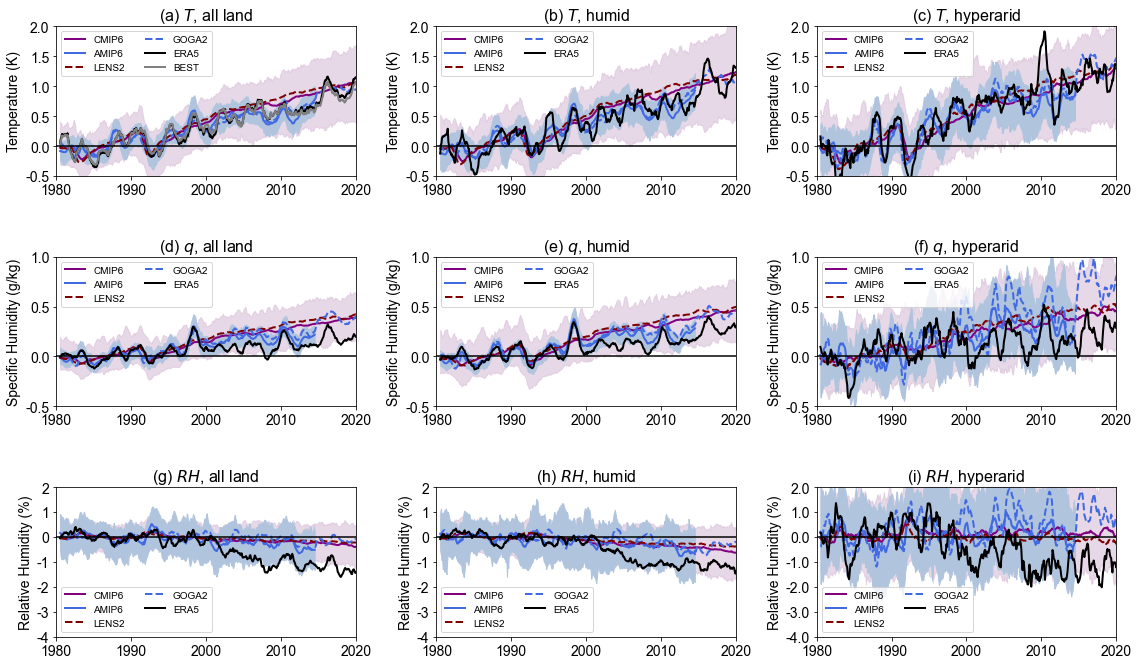

In [10]:
fig = plt.figure(figsize=(16,16))

ax = plotpanel(fig, 'allland', era5_t_12m, cmip6_t_12m, amip6_t_12m, lens2_t_12m, goga2_t_12m,
               [-0.5,2.],[-0.5,0,0.5,1,1.5,2],['-0.5','0.0','0.5','1.0','1.5','2.0'],
               '(a) $T$, all land','Temperature (K)',0.02,0.28,0.84,0.97, best = best_t_12m) 

ax = plotpanel(fig, 'humid', era5_t_12m, cmip6_t_12m, amip6_t_12m, lens2_t_12m, goga2_t_12m,
               [-0.5,2.],[-0.5,0,0.5,1,1.5,2],['-0.5','0.0','0.5','1.0','1.5','2.0'],
               '(b) $T$, humid','Temperature (K)',0.35,0.61,0.84,0.97, ) 

ax = plotpanel(fig, 'hyperarid', era5_t_12m, cmip6_t_12m, amip6_t_12m, lens2_t_12m, goga2_t_12m,
               [-0.5,2.],[-0.5,0,0.5,1,1.5,2],['-0.5','0.0','0.5','1.0','1.5','2.0'],
               '(c) $T$, hyperarid','Temperature (K)',0.68,0.94,0.84,0.97) 


ax = plotpanel(fig, 'allland', era5_q_12m, cmip6_q_12m, amip6_q_12m, lens2_q_12m, goga2_q_12m,
               [-0.5,1],[-0.5,0,0.5,1],['-0.5','0.0','0.5','1.0'],
               '(d) $q$, all land','Specific Humidity (g/kg)',0.02,0.28,0.64,0.77) 

ax = plotpanel(fig, 'humid', era5_q_12m, cmip6_q_12m, amip6_q_12m, lens2_q_12m, goga2_q_12m,
               [-0.5,1],[-0.5,0,0.5,1],['-0.5','0.0','0.5','1.0'],
               '(e) $q$, humid','Specific Humidity (g/kg)',0.35,0.61,0.64,0.77, ) 

ax = plotpanel(fig, 'hyperarid', era5_q_12m, cmip6_q_12m, amip6_q_12m, lens2_q_12m, goga2_q_12m,
               [-0.5,1],[-0.5,0,0.5,1],['-0.5','0.0','0.5','1.0'],
               '(f) $q$, hyperarid','Specific Humidity (g/kg)',0.68,0.94,0.64,0.77) 

ax = plotpanel(fig, 'allland', era5_relhum_12m, cmip6_relhum_12m, amip6_relhum_12m, lens2_relhum_12m, goga2_relhum_12m,
               [-4,2],[-4,-3,-2,-1,0,1,2],['-4','-3','-2','-1','0','1','2'],
               '(g) $RH$, all land','Relative Humidity (%)',0.02,0.28,0.44,0.57, legendloc='lower left') 

ax = plotpanel(fig, 'humid', era5_relhum_12m, cmip6_relhum_12m, amip6_relhum_12m, lens2_relhum_12m, goga2_relhum_12m,
               [-4,2],[-4,-3,-2,-1,0,1,2],['-4','-3','-2','-1','0','1','2'],
               '(h) $RH$, humid','Relative Humidity (%)',0.35,0.61,0.44,0.57, legendloc='lower left') 

ax = plotpanel(fig, 'hyperarid', era5_relhum_12m, cmip6_relhum_12m, amip6_relhum_12m, lens2_relhum_12m, goga2_relhum_12m,
               [-4,2],[-4,-3,-2,-1,0,1,2],['-4.0','-3.0','-2.0','-1.0','0.0','1.0','2.0'],
               '(i) $RH$, hyperarid','Relative Humidity (%)',0.68,0.94,0.44,0.57, legendloc='lower left') 




fig.savefig(plotpath+'figS22.pdf', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'figS22.png', bbox_inches='tight', facecolor='white')